## Linear Regression 

In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This a simple linear regression task as it includes two variables. After training the model predict the marks scored by a student who studies for 9.25 hours.

## Import the Libraries

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading the dataset

In [3]:
url = 'http://bit.ly/w-data'

#Loading the data in csv format
df = pd.read_csv(url)
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


## Exploring the dataset

Here we will explore the dataset that is we are going to have look into the shape of data, number of rows and column, head and tail etc

In [7]:
# Printing the shape of the dataset
print("Shape: ",df.shape)
print("________________________________________________________")
#Printing head of the data.
print(df.head())
print("________________________________________________________")
#Printing the tail of the data.
print(df.tail())

Shape:  (25, 2)
________________________________________________________
   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
________________________________________________________
    Hours  Scores
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [9]:
# Checking if there is any null values in data or not.
print(df.isnull().sum())

Hours     0
Scores    0
dtype: int64


In [16]:
#df.info()
print(df.describe())
#print(df['Scores'].value_counts())

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


So as we can see above there is not any null values in the given dataset so now we can move ahead.

## Plotting the data
Now we will plot the data to see if there's any kind of relation in them or not.

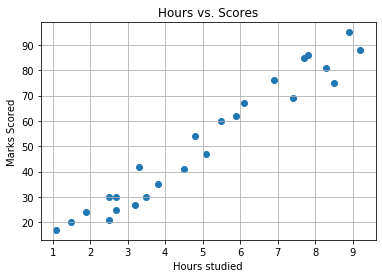

In [19]:
plt.scatter(df['Hours'],df['Scores'])
plt.xlabel('Hours studied')
plt.ylabel('Marks Scored')
plt.title('Hours vs. Scores')
plt.grid(True)
plt.show()

## Plotting the heatmap of the data
As we have seen above in the scatter plot that there is kind of linear relationship in Hours and Scores so before using linear regression let's check if there's any kind of correlation between them or not.

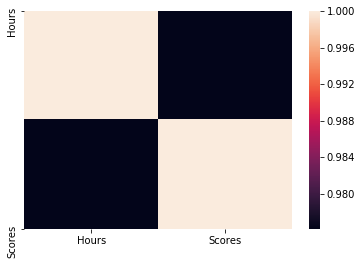

In [24]:
cor = df.corr()
sns.heatmap(cor)

Now that we have seen the correlation of the data, so we can move further to apply Linear Regression on our data.

## Pre-processing the data
Before jumping into the fitting and prediction we first need to pre-process our data so that it's easier for us to pass the data into linear regression functions readily.

In [25]:
# X is the feature for Linear Regression
X = df.iloc[:,:-1].values
# Y is the response for Linear Regression
Y = df.iloc[:,1].values

## Splitting the data
Now that we have our features and response ready in hands, let's split the data into training and test set. we will split our data by using test_train_split() method of sklearn.

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

## Training the Linear model
Now that our data is split into train and test set so let's just train our model using the train set. we are going to use LinearRegression of sklearn.

In [47]:
# Importing the LinearRegression from sklearn.linear_model
from sklearn.linear_model import LinearRegression  

#Creating Linear Regression object
reg = LinearRegression()  
#Fitting the train set
reg.fit(X_train, y_train) 

print('The Training is complete.')

The Training is complete.


In [48]:
# Coefficients
print('Coeffiecients:',reg.coef_)

# Intercept
print('Intercept:',reg.intercept_)

Coeffiecients: [9.91065648]
Intercept: 2.018160041434683


## Plotting the regression line
Now that we have our data all trained so we will plot the best fit line or regression line using matplotlib's plot() method.

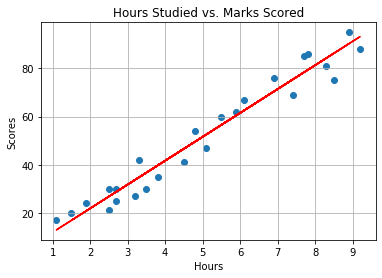

In [49]:
# Plotting for the test data
plt.scatter(X, Y)
# Here mx+c = reg.coef_*X+reg.intercept
plt.plot(X, reg.coef_*X+reg.intercept_,color='r')
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.title('Hours Studied vs. Marks Scored')
plt.grid(True)
plt.show()

## Predicting the scores
Now that we have our model all fitted so let's predict the test scores using our model.

In [50]:
# Printing the x_test values
print(X_test)

# Printing the predicted y_pred
y_pred = reg.predict(X_test)
print(y_pred)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


## Accuracy of our model
Here we will check the accuracy of our linear model by using score() function as follows.

In [51]:
reg.score(X_test,y_test)

0.9454906892105356

## Mean squared error
Here we will find the mean squared error of our model by using mean_absolute_error().

In [52]:
from sklearn.metrics import confusion_matrix, r2_score, mean_squared_error
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))

Mean Squared Error: 21.5987693072174


In [53]:
#confusion_matrix(y_test, y_pred)

In [54]:
r2_score(y_test, y_pred)

0.9454906892105356

## Predicting the score of student studying for 9.25 hours.

In [59]:
# Predicting the marks scored using the linear model.
hours = np.array([9.25]).reshape(-1, 1) 
score = reg.predict(hours)

print('The student studying for',hours,'hours will score',score)

The student studying for [[9.25]] hours will score [93.69173249]
